# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
230825,0.7983,0.0513,0.8862,0.8032,0.1025,0.1343,0.6738,0.5249,0.8887,0.0757,5,5,16,16
205408,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0903,0.0024,0.0439,5,0,13,13
113331,0.1489,0.9351,0.1294,0.0073,0.0024,0.0293,1.7554,0.3931,0.4272,1.2085,5,5,2,2
156006,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0610,0.0024,0.1221,6,0,7,7
420019,0.0024,0.0049,0.0171,0.0024,0.0024,0.0024,0.0049,0.1270,0.0757,0.0122,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [73]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [74]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_40 (Dense)            (None, 3000)              33000     
                                                                 
 dense_41 (Dense)            (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_42 (Dense)            (None, 750)               1125750   
                                                                 
 dense_43 (Dense)            (None, 375)               281625    
                                                                 
 dense_44 (Dense)            (None, 48)                1804

# 2. Compile Network

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [77]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 3s 28ms/step - loss: 1.3858 - accuracy: 0.6522 - val_loss: 0.9775 - val_accuracy: 0.7351
Epoch 2/300
75/75 [==============================] - 2s 25ms/step - loss: 0.8828 - accuracy: 0.7616 - val_loss: 0.7665 - val_accuracy: 0.7889
Epoch 3/300
75/75 [==============================] - 2s 26ms/step - loss: 0.7160 - accuracy: 0.8010 - val_loss: 0.6568 - val_accuracy: 0.8156
Epoch 4/300
75/75 [==============================] - 2s 26ms/step - loss: 0.6375 - accuracy: 0.8208 - val_loss: 0.6030 - val_accuracy: 0.8289
Epoch 5/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5846 - accuracy: 0.8338 - val_loss: 0.5549 - val_accuracy: 0.8421
Epoch 6/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5440 - accuracy: 0.8441 - val_loss: 0.5184 - val_accuracy: 0.8515
Epoch 7/300
75/75 [==============================] - 2s 26ms/step - loss: 0.5192 - accuracy: 0.8517 - val_loss: 0.5059 - val_accuracy: 0.8551
Epoch 

75/75 [==============================] - 2s 26ms/step - loss: 0.2181 - accuracy: 0.9378 - val_loss: 0.2415 - val_accuracy: 0.9324
Epoch 59/300
75/75 [==============================] - 2s 26ms/step - loss: 0.2105 - accuracy: 0.9402 - val_loss: 0.2473 - val_accuracy: 0.9306
Epoch 60/300
75/75 [==============================] - 2s 26ms/step - loss: 0.2169 - accuracy: 0.9382 - val_loss: 0.2559 - val_accuracy: 0.9289
Epoch 61/300
75/75 [==============================] - 2s 26ms/step - loss: 0.2127 - accuracy: 0.9394 - val_loss: 0.2461 - val_accuracy: 0.9308
Epoch 62/300
75/75 [==============================] - 2s 26ms/step - loss: 0.2104 - accuracy: 0.9401 - val_loss: 0.2470 - val_accuracy: 0.9316
Epoch 63/300
75/75 [==============================] - 2s 26ms/step - loss: 0.2094 - accuracy: 0.9401 - val_loss: 0.2470 - val_accuracy: 0.9310
Epoch 64/300
75/75 [==============================] - 2s 27ms/step - loss: 0.2071 - accuracy: 0.9411 - val_loss: 0.2427 - val_accuracy: 0.9326
Epoch 65/300

75/75 [==============================] - 2s 27ms/step - loss: 0.1656 - accuracy: 0.9533 - val_loss: 0.2277 - val_accuracy: 0.9400
Epoch 116/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1632 - accuracy: 0.9541 - val_loss: 0.2223 - val_accuracy: 0.9404
Epoch 117/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1804 - accuracy: 0.9504 - val_loss: 0.2734 - val_accuracy: 0.9285
Epoch 118/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1770 - accuracy: 0.9500 - val_loss: 0.2229 - val_accuracy: 0.9395
Epoch 119/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1597 - accuracy: 0.9549 - val_loss: 0.2245 - val_accuracy: 0.9404
Epoch 120/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1601 - accuracy: 0.9549 - val_loss: 0.2210 - val_accuracy: 0.9422
Epoch 121/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1611 - accuracy: 0.9550 - val_loss: 0.2282 - val_accuracy: 0.9395
Epoch 

Epoch 172/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1400 - accuracy: 0.9608 - val_loss: 0.2175 - val_accuracy: 0.9449
Epoch 173/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1365 - accuracy: 0.9616 - val_loss: 0.2186 - val_accuracy: 0.9450
Epoch 174/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1414 - accuracy: 0.9601 - val_loss: 0.2205 - val_accuracy: 0.9442
Epoch 175/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1369 - accuracy: 0.9614 - val_loss: 0.2208 - val_accuracy: 0.9441
Epoch 176/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1367 - accuracy: 0.9617 - val_loss: 0.2240 - val_accuracy: 0.9442
Epoch 177/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1377 - accuracy: 0.9613 - val_loss: 0.2229 - val_accuracy: 0.9447
Epoch 178/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1397 - accuracy: 0.9607 - val_loss: 0.2185 - val_accuracy:

Epoch 229/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1241 - accuracy: 0.9653 - val_loss: 0.2272 - val_accuracy: 0.9462
Epoch 230/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1244 - accuracy: 0.9649 - val_loss: 0.2193 - val_accuracy: 0.9477
Epoch 231/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1226 - accuracy: 0.9657 - val_loss: 0.2215 - val_accuracy: 0.9472
Epoch 232/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1256 - accuracy: 0.9650 - val_loss: 0.2187 - val_accuracy: 0.9466
Epoch 233/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1225 - accuracy: 0.9658 - val_loss: 0.2209 - val_accuracy: 0.9469
Epoch 234/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1224 - accuracy: 0.9655 - val_loss: 0.2200 - val_accuracy: 0.9478
Epoch 235/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1210 - accuracy: 0.9661 - val_loss: 0.2154 - val_accuracy:

Epoch 286/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1128 - accuracy: 0.9682 - val_loss: 0.2258 - val_accuracy: 0.9477
Epoch 287/300
75/75 [==============================] - 2s 30ms/step - loss: 0.1121 - accuracy: 0.9685 - val_loss: 0.2271 - val_accuracy: 0.9474
Epoch 288/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1134 - accuracy: 0.9681 - val_loss: 0.2269 - val_accuracy: 0.9479
Epoch 289/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1135 - accuracy: 0.9678 - val_loss: 0.2269 - val_accuracy: 0.9478
Epoch 290/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1133 - accuracy: 0.9680 - val_loss: 0.2227 - val_accuracy: 0.9479
Epoch 291/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1137 - accuracy: 0.9679 - val_loss: 0.2272 - val_accuracy: 0.9478
Epoch 292/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1133 - accuracy: 0.9679 - val_loss: 0.2262 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

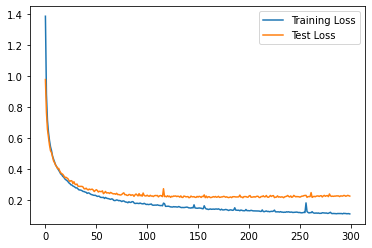

In [78]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

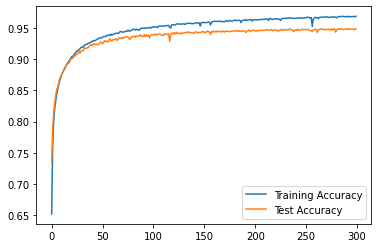

In [79]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [80]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 5s 2ms/step - loss: 0.2257 - accuracy: 0.9484


##  4.3 Make Predictions

In [81]:
predictions = model.predict(X_test)

In [82]:
predictions

array([[9.97636080e-01, 2.73465250e-08, 1.07962376e-04, ...,
        4.88408247e-08, 9.48978141e-08, 1.19607666e-08],
       [2.05656894e-37, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.18623328e-01, 2.22342573e-02, 1.33453577e-03, ...,
        2.08075630e-06, 5.26231547e-09, 1.53041594e-06],
       ...,
       [2.09843847e-07, 4.24011141e-14, 4.35414110e-16, ...,
        5.50314235e-16, 1.93676076e-13, 1.89363347e-23],
       [9.87774193e-01, 1.70205324e-03, 6.89684693e-03, ...,
        1.63209961e-06, 5.58209740e-06, 2.45342221e-06],
       [1.11240729e-13, 1.33564827e-16, 2.51333719e-12, ...,
        1.07356944e-20, 1.54395225e-22, 1.43924278e-29]], dtype=float32)